<div align="center" style="font-size: 24px; font-weight: bold;">Electrical and Computer Engineering Department</div>
<div align="center" style="font-size: 18px;font-weight: bold;">First Semester, 2023/2024</div>
<div align="center" style="font-size: 20px; font-weight: bold;">Computer Vision ‐ ENCS5343</div>
<div align="center" style="font-size: 18px; font-weight: bold;">Course Project</div>
<hr>
<div align="center" style="font-size: 16px;">Prepared by:</div>
<div align="center" style="font-size: 16px;">Mohammad AbuJaber | 1190298</div>
<div align="center" style="font-size: 16px;">Qays Safa | 1190880</div>
<div align="center" style="font-size: 16px;">Instructor: Dr. Aziz Qaroush</div>
<div align="center" style="font-size: 16px;">Date: 29th January 2024</div>
<hr>

# Introduction

In this report, we delve into the challenging realm of Arabic Handwritten Character Recognition (AHCR) using state-of-the-art Convolutional Neural Networks (CNNs). The Arabic script, with its semi-cursive nature and positional character variations, presents a unique challenge. Our objective is to navigate these complexities by building, training, and experimenting with various CNN models. This includes exploring data augmentation techniques and analyzing the performance of different architectures like LeNet, AlexNet, and ResNet. The ultimate goal is to harness deep learning to effectively address a real-world problem in computer vision, providing a comprehensive learning experience in the process.

# Dataset

The 'Arabic Handwritten Characters Dataset' is a comprehensive dataset designed for the recognition of Arabic handwritten characters. It consists of 16,800 characters written by 60 participants, aged between 19 to 40 years, with 90% of the participants being right-handed. Each participant wrote each character, from 'أ' to 'ي', ten times on two forms. The dataset is divided into training and testing sets. The training set contains 13,440 characters (480 images per class), and the test set contains 3,360 characters (120 images per class). The writers of the training set and test set are exclusive. 

The dataset files include 'csvTestImages 3360x1024.csv', 'csvTestLabel 3360x1.csv', 'csvTrainImages 13440x1024.csv', 'csvTrainLabel 13440x1.csv', and 'Train+Test Images Matlab.mat'. These files contain the image data and corresponding labels for both the training and testing sets. The 'Test Images 3360x32x32' and 'Train Images 13440x32x32' directories presumably contain the image data in a non-CSV format. 

This dataset is a valuable resource for developing and benchmarking models for Arabic handwritten character recognition.

## Importing Libraries

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from itertools import product
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## Loading Images

In [3]:
train_folder = '/kaggle/input/cv-project-dataset/Train Images 13440x32x32/train'
test_folder = '/kaggle/input/cv-project-dataset/Test Images 3360x32x32/test'

# Function to load images from a folder
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith(".png"):
            img = cv2.imread(os.path.join(folder, filename))
            if img is not None:
                images.append(img)
    return images

train_images = load_images_from_folder(train_folder)
test_images = load_images_from_folder(test_folder)

# Convert lists of images to numpy arrays
train_data = np.array(train_images)
test_data = np.array(test_images)

## Sample Image Example

Training Dataset:

Number of images: 13440

Shape of the training data: (13440, 32, 32, 3)

Data type of the training data: uint8



Testing Dataset:

Number of images: 3360

Shape of the testing data: (3360, 32, 32, 3)

Data type of the testing data: uint8


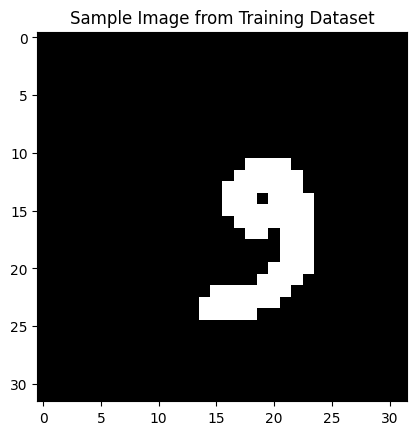

In [1]:
print("Training Dataset:")
print("Number of images:", len(train_images))
print("Shape of the training data:", train_data.shape)
print("Data type of the training data:", train_data.dtype)

print("\nTesting Dataset:")
print("Number of images:", len(test_images))
print("Shape of the testing data:", test_data.shape)
print("Data type of the testing data:", test_data.dtype)

plt.imshow(train_data[0])
plt.title("Sample Image from Training Dataset")
plt.show()

# Task 1: Build and train a custom CNN network for AHCR

In this task, we designed and implemented a custom Convolutional Neural Network (CNN) for Arabic handwritten character recognition (AHCR). Our approach involved several key steps:

### Data Loading and Preprocessing:

We loaded the dataset containing images and labels of Arabic handwritten characters. To prepare this data for the CNN, we normalized the pixel values to the range [0, 1] and reshaped the images to 32x32 pixels with a single color channel. Additionally, we used label encoding to convert the character labels into a numerical format suitable for the model.

In [4]:
train_images = np.loadtxt("/kaggle/input/cv-project-dataset/csvTrainImages 13440x1024.csv", delimiter=",")
train_labels = np.loadtxt("/kaggle/input/cv-project-dataset/csvTrainLabel 13440x1.csv", delimiter=",")
test_images = np.loadtxt("/kaggle/input/cv-project-dataset/csvTestImages 3360x1024.csv", delimiter=",")
test_labels = np.loadtxt("/kaggle/input/cv-project-dataset/csvTestLabel 3360x1.csv", delimiter=",")

# Normalize the pixel values to the range [0, 1]
train_images /= 255.0
test_images /= 255.0

# Reshape the data to match the input shape expected by the CNN
train_images = train_images.reshape((-1, 32, 32, 1))
test_images = test_images.reshape((-1, 32, 32, 1))

label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

train_images, val_images, train_labels_encoded, val_labels_encoded = train_test_split(
    train_images, train_labels_encoded, test_size=0.2, random_state=42
)

### CNN Architecture Design:

Our CNN model consisted of multiple layers. We added convolutional layers to extract features from the images, each followed by a max-pooling layer to reduce the spatial size of the representation, thus reducing the number of parameters and computation in the network. After the convolutional layers, we flattened the output to feed it into dense layers for classification. We included dropout layers for regularization to prevent overfitting.


### Model Tuning:

Before embarking on Task 1, we conducted a grid search to optimize the parameters of our Convolutional Neural Network for Arabic Handwritten Character Recognition. This process involved systematically varying parameters such as the optimizer, dropout rate, activation function, number of convolutional and dense layers, and the number of filters in the convolutional layers. The significance of this grid search lies in its ability to explore a wide range of parameter combinations to find the most effective configuration for our model. By training and validating multiple models with different parameters, we could identify which combination yielded the highest accuracy on our validation dataset. This approach ensures that our final model is tuned to the specifics of our data, potentially improving its performance and generalizability. Using the best parameter set from the grid search, we then created and trained our final model. This approach allowed us to start Task 1 with a robust and well-optimized CNN model, setting a strong foundation for the subsequent tasks in our project.

### Model Evaluation and Visualization:

After training, we evaluated the model's performance on a separate test dataset. We also plotted the training and validation accuracy and loss over epochs to visually assess the model's learning progress.

Following the grid search optimization in our project, we ran Task 1 with the best parameters for 10 epochs, achieving an accuracy of 91.01%.

Training with parameters: {'optimizer': 'adam', 'dropout_rate': 0.3, 'activation': 'relu', 'num_conv_layers': 1, 'num_dense_layers': 1, 'conv_layer_filters': 32, 'dense_layer_units': 64}

Training with parameters: {'optimizer': 'adam', 'dropout_rate': 0.3, 'activation': 'relu', 'num_conv_layers': 1, 'num_dense_layers': 1, 'conv_layer_filters': 32, 'dense_layer_units': 128}

Training with parameters: {'optimizer': 'adam', 'dropout_rate': 0.3, 'activation': 'relu', 'num_conv_layers': 1, 'num_dense_layers': 1, 'conv_layer_filters': 64, 'dense_layer_units': 64}

Training with parameters: {'optimizer': 'adam', 'dropout_rate': 0.3, 'activation': 'relu', 'num_conv_layers': 1, 'num_dense_layers': 1, 'conv_layer_filters': 64, 'dense_layer_units': 128}

Training with parameters: {'optimizer': 'adam', 'dropout_rate': 0.3, 'activation': 'relu', 'num_conv_layers': 1, 'num_dense_layers': 2, 'conv_layer_filters': 32, 'dense_layer_units': 64}

Training with parameters: {'optimizer': 'adam', 'dropout_r

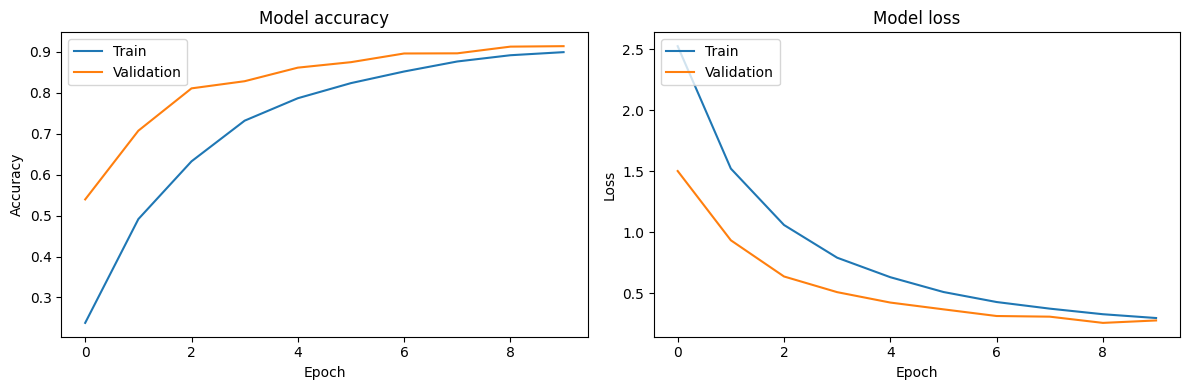

In [44]:
def create_model(optimizer='adam', dropout_rate=0.5, activation='relu',
                 num_conv_layers=1, num_dense_layers=1,
                 conv_layer_filters=32, dense_layer_units=128):
    model = models.Sequential()

    # Add convolutional layers
    for _ in range(num_conv_layers):
        model.add(layers.Conv2D(conv_layer_filters, (3, 3), activation=activation, input_shape=(32, 32, 1)))
        model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())

    # Add dense layers
    for _ in range(num_dense_layers):
        model.add(layers.Dense(dense_layer_units, activation=activation))
        model.add(layers.Dropout(dropout_rate))

    model.add(layers.Dense(len(np.unique(train_labels_encoded)), activation='softmax'))

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

param_grid = {
    'optimizer': ['adam', 'sgd', 'rmsprop'],
    'dropout_rate': [0.3, 0.5, 0.7],
    'activation': ['relu', 'tanh', 'sigmoid'],
    'num_conv_layers': [1, 2],
    'num_dense_layers': [1, 2],
    'conv_layer_filters': [32, 64],
    'dense_layer_units': [64, 128]
}

results = []

for params in product(*param_grid.values()):
    param_dict = dict(zip(param_grid.keys(), params))
    print("Training with parameters:", param_dict)

    model = create_model(**param_dict)

    # Train the model
    history = model.fit(train_images, train_labels_encoded, epochs=10, batch_size=64,
                        validation_data=(val_images, val_labels_encoded), verbose=0)

    # Evaluate on the validation set
    val_loss, val_acc = model.evaluate(val_images, val_labels_encoded, verbose=0)

    results.append({
        'params': param_dict,
        'val_loss': val_loss,
        'val_acc': val_acc,
    })

# Find the best set of parameters
best_result = max(results, key=lambda x: x['val_acc'])
best_params = best_result['params']

print("Best parameters:", best_params)
print("Validation Accuracy:", best_result['val_acc'])

final_model = create_model(**best_params)
final_history = final_model.fit(train_images, train_labels_encoded, epochs=10, batch_size=64,
                                validation_data=(val_images, val_labels_encoded), verbose=1)

test_loss, test_acc = final_model.evaluate(test_images, test_labels_encoded)
print(f'Test Accuracy: {test_acc}')

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(final_history.history['accuracy'])
plt.plot(final_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(final_history.history['loss'])
plt.plot(final_history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

Subsequently, to further enhance the model's performance, we extended the training to 30 epochs. This longer training period led to a notable improvement, with the accuracy increasing to 93.12%. This progression demonstrates the impact of extended training on the model's ability to learn and adapt, highlighting the importance of choosing the right number of epochs in deep learning models.

Epoch 1/30

168/168 [==============================] - 2s 6ms/step - loss: 2.5627 - accuracy: 0.2261 - val_loss: 1.5749 - val_accuracy: 0.5153

Epoch 2/30

168/168 [==============================] - 1s 4ms/step - loss: 1.5576 - accuracy: 0.4857 - val_loss: 0.9611 - val_accuracy: 0.7061

Epoch 3/30

168/168 [==============================] - 1s 4ms/step - loss: 1.0971 - accuracy: 0.6316 - val_loss: 0.6727 - val_accuracy: 0.7820

Epoch 4/30

168/168 [==============================] - 1s 4ms/step - loss: 0.8414 - accuracy: 0.7112 - val_loss: 0.5440 - val_accuracy: 0.8251

Epoch 5/30

168/168 [==============================] - 1s 4ms/step - loss: 0.6962 - accuracy: 0.7637 - val_loss: 0.4506 - val_accuracy: 0.8512

Epoch 6/30

168/168 [==============================] - 1s 5ms/step - loss: 0.5718 - accuracy: 0.8081 - val_loss: 0.3797 - val_accuracy: 0.8802

Epoch 7/30

168/168 [==============================] - 1s 4ms/step - loss: 0.4815 - accuracy: 0.8411 - val_loss: 0.3459 - val_accuracy: 

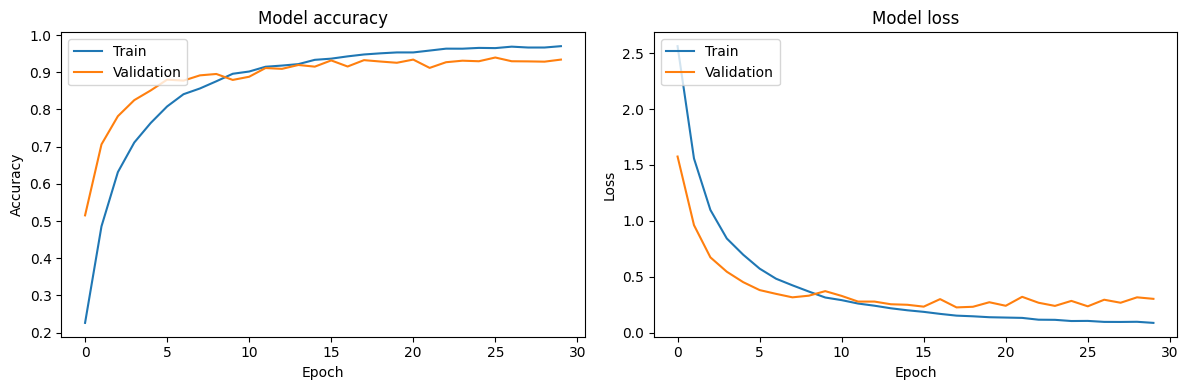

In [5]:
best_params = {'optimizer': 'rmsprop', 'dropout_rate': 0.3, 'activation': 'relu', 'num_conv_layers': 2, 'num_dense_layers': 2, 'conv_layer_filters': 64, 'dense_layer_units': 128}

final_model = create_model(**best_params)

final_history = final_model.fit(train_images, train_labels_encoded, epochs=30, batch_size=64,
                                validation_data=(val_images, val_labels_encoded), verbose=1)

test_loss, test_acc = final_model.evaluate(test_images, test_labels_encoded)
print(f'Test Accuracy: {test_acc}')

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(final_history.history['accuracy'])
plt.plot(final_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(final_history.history['loss'])
plt.plot(final_history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Task 2: Retrain the network selected from Task 1 after doing data augmentation

In this task, we enhanced the Convolutional Neural Network (CNN) developed in Task 1 by applying data augmentation techniques to improve its ability to recognize Arabic handwritten characters.

### Data Augmentation Implementation:

To enhance the training data, we employed ImageDataGenerator from TensorFlow on our best model from task 1. This tool allowed us to augment the training data with various transformations, including rotations, width and height shifts, shear, and zoom. Notably, we avoided horizontal flipping, considering the directional nature of Arabic script.

### Training with Augmented Data:

The augmented data, generated in varied forms for each training epoch, was used to train the model. This approach aimed to improve the model's generalization by exposing it to a broader range of handwriting variations. We trained the model for 30 epochs with a batch size of 64, using a portion of the data as a validation set.

### Evaluation and Visualization:

We assessed the model's performance and visualized the training and validation accuracy and loss over the epochs. These plots were crucial for understanding the learning dynamics and the impact of data augmentation on the model's performance.

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3

  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Epoch 1/30

168/168 [==============================] - 9s 27ms/step - loss: 2.9989 - accuracy: 0.1247 - val_loss: 1.9324 - val_accuracy: 0.4196

Epoch 2/30

168/168 [==============================] - 4s 26ms/step - loss: 2.2631 - accuracy: 0.2852 - val_loss: 1.4699 - val_accuracy: 0.4710

Epoch 3/30

168/168 [==============================] - 4s 25ms/step - loss: 1.8726 - accuracy: 0.3815 - val_loss: 0.9571 - val_accuracy: 0.7117

Epoch 4/30

168/168 [==============================] - 4s 25ms/step - loss: 1.5946 - accuracy: 0.4656 - val_loss: 0.7485 - val_accuracy: 0.7582

Epoch 5/30

168/168 [==============================] - 4s 25ms/step - loss: 1.4261 - accuracy: 0.5113 - val_loss: 0.6475 - val_accuracy: 0.7824

Epoch 6/30

168/168 [==============================] - 4s 25ms/step - loss: 1.2800 - accuracy: 0.5681 - val_loss: 0.5343 - val_accuracy: 0.8263

Epoch 7/30

168/168 [==============================] - 4s 26ms/step - loss: 1.1770 - accuracy: 0.6056 - val_loss: 0.4644 - val_acc

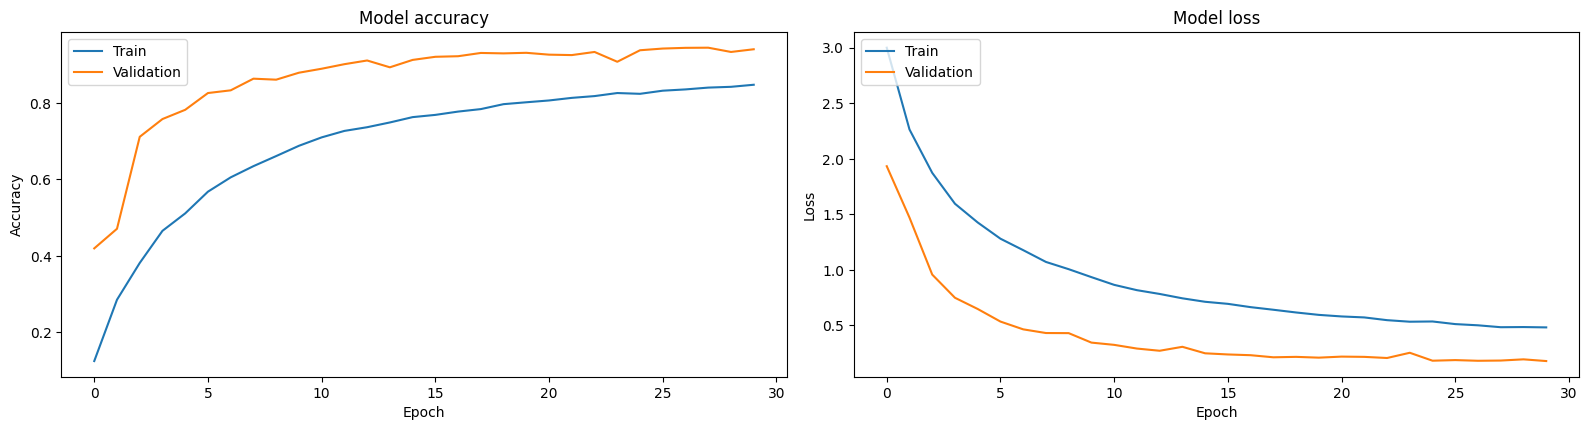

In [2]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    fill_mode='nearest'
)

datagen.fit(train_images)

final_history = final_model.fit(datagen.flow(train_images, train_labels_encoded, batch_size=64),
                                steps_per_epoch=len(train_images) // 64, epochs=30,
                                validation_data=(val_images, val_labels_encoded), verbose=1)

test_loss, test_acc = final_model.evaluate(test_images, test_labels_encoded)
print(f'Test Accuracy: {test_acc}')

plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
plt.plot(final_history.history['accuracy'])
plt.plot(final_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(2, 2, 2)
plt.plot(final_history.history['loss'])
plt.plot(final_history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

### Results and Analysis:

The final test's accuracy was recorded, providing a quantifiable measure of the model's performance. We expected that the data augmentation would lead to an improvement in the model's ability to generalize, as indicated by higher accuracy of 94.7%. In summary, this task focused on employing data augmentation techniques to refine our CNN model for Arabic handwritten character recognition, aiming to enhance its robustness and generalization capabilities.

# Task 3: Select a CNN network from a list of well-known and published CNN architectures, such as LeNet, AlexNet, ResNet, and so on. You must make a tradeoff between accuracy and network complexity with respect to the problem and the dataset provided. Train it using the data augmentation techniques you used in Task 2

### Choosing Model

AlexNet is a suitable model for Arabic Handwritten Characters recognition due to its simplicity and lower complexity. Its low complexity, measured in operations or G-FLOPs, makes it suitable for tasks where computational resources are limited or interpretability and speed are prioritized. AlexNet uses effective regularization techniques, such as dropout regularization, to prevent overfitting, especially when training large parameters. It also uses the ReLU activation function, resulting in faster training times for large datasets. Despite not offering the highest accuracy, AlexNet provides a balance between performance and complexity, making it a practical choice for many applications.

In this task, we progressed from our custom CNN model to adopting the AlexNet architecture, a well-known CNN, and integrating the data augmentation techniques used in Task 2.

The key **differences** and additions to this task include:

### AlexNet Implementation:

We adapted the AlexNet architecture to fit our dataset. This involved modifying layer configurations to suit 32x32 images, contrasting the larger image input size AlexNet was originally designed for.

### Training and Evaluation:

The AlexNet model was trained for 30 epochs with augmented data. We achieved a significant improvement in accuracy, reaching 97.32%, demonstrating the effectiveness of AlexNet in handling complex recognition tasks compared to the custom CNN model in Task 2. This task underscores the impact of advanced, pre-established CNN architectures on model performance, especially in complex recognition tasks.

Epoch 1/30

168/168 [==============================] - 8s 27ms/step - loss: 2.8201 - accuracy: 0.1248 - val_loss: 1.6193 - val_accuracy: 0.3910

Epoch 2/30

168/168 [==============================] - 4s 24ms/step - loss: 1.5177 - accuracy: 0.4550 - val_loss: 0.7915 - val_accuracy: 0.7109

Epoch 3/30

168/168 [==============================] - 4s 24ms/step - loss: 0.8397 - accuracy: 0.7068 - val_loss: 0.4341 - val_accuracy: 0.8504

Epoch 4/30

168/168 [==============================] - 4s 24ms/step - loss: 0.6001 - accuracy: 0.7931 - val_loss: 0.3399 - val_accuracy: 0.8821

Epoch 5/30

168/168 [==============================] - 4s 25ms/step - loss: 0.4895 - accuracy: 0.8337 - val_loss: 0.2387 - val_accuracy: 0.9193

Epoch 6/30

168/168 [==============================] - 4s 25ms/step - loss: 0.4091 - accuracy: 0.8634 - val_loss: 0.3398 - val_accuracy: 0.8899

Epoch 7/30

168/168 [==============================] - 4s 25ms/step - loss: 0.3470 - accuracy: 0.8868 - val_loss: 0.1713 - val_acc

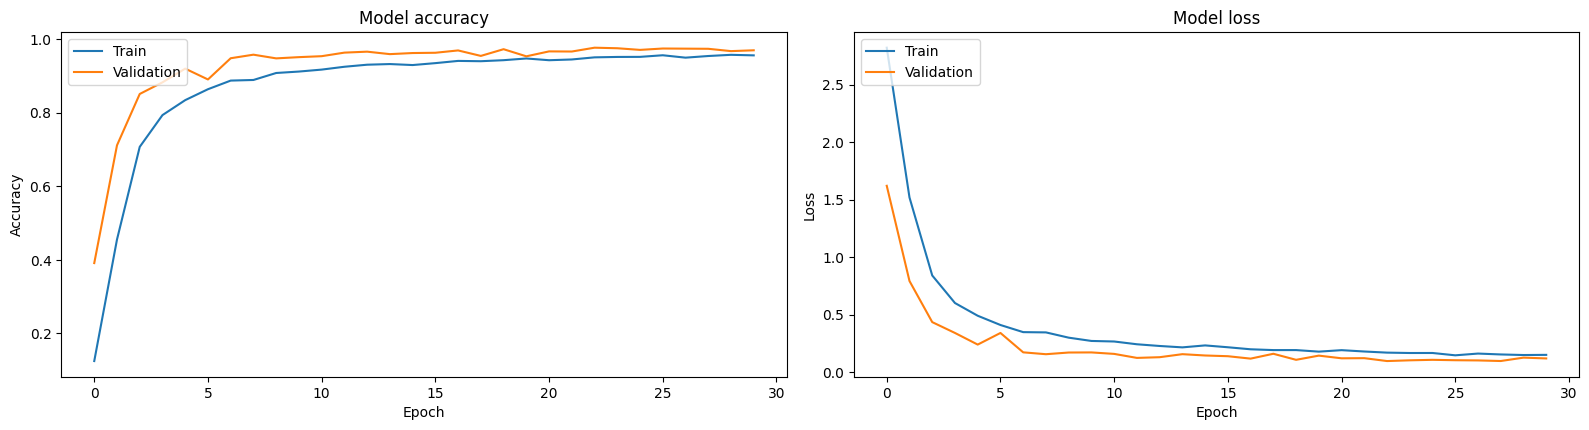

In [9]:
def create_alexnet_model(input_shape=(32, 32, 1), num_classes=10):
    model = models.Sequential()

    model.add(layers.Conv2D(48, kernel_size=(3, 3), activation='relu', input_shape=input_shape, padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(192, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(192, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Flattening the output
    model.add(layers.Flatten())

    # Fully Connected Layers
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

alexnet_model = create_alexnet_model(input_shape=(32, 32, 1), num_classes=len(np.unique(train_labels_encoded)))

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    fill_mode='nearest'
)

datagen.fit(train_images)

history = alexnet_model.fit(datagen.flow(train_images, train_labels_encoded, batch_size=64),
                            steps_per_epoch=len(train_images) // 64, epochs=30,
                            validation_data=(val_images, val_labels_encoded), verbose=1)

test_loss, test_acc = alexnet_model.evaluate(test_images, test_labels_encoded)
print(f'Test Accuracy: {test_acc}')

plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(2, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Task 4: Use a pre-trained CNN network on similar tasks and choose the appropriate transfer learning method to fine tune the pretrained network on the given dataset

### Choosing Model:

ResNet, a deep learning neural network, is a suitable choice for Arabic handwritten character recognition due to its deep architecture, residual learning, and skip connections. ResNet can handle networks deeper than previous architectures, making it ideal for complex tasks like Arabic handwritten character recognition. It addresses the vanishing/exploding gradient problem and allows gradients to be directly backpropagated to earlier layers. Despite its complexity, ResNet's residual learning and skip connections ensure the learning process doesn't hinder the learning process. Its impressive accuracy in various similar tasks makes it a suitable choice for Arabic handwritten character recognition.

We leveraged the power of transfer learning by integrating the ResNet50 model, pre-trained on a large and diverse image dataset. After customizing the model for our Arabic Handwritten Character Recognition task, we employed data augmentation techniques to enhance our dataset. This method of retraining a sophisticated network previously trained on a large corpus allows us to benefit from deep, learned image features while adapting to our specific classification task. The fine-tuning yielded a commendable test accuracy of 94.3%, underscoring the efficacy of transfer learning in complex recognition tasks with nuanced datasets.

Epoch 1/30

336/336 [==============================] - 44s 42ms/step - loss: 2.5212 - accuracy: 0.3035 - val_loss: 10.8243 - val_accuracy: 0.0402

Epoch 2/30

336/336 [==============================] - 13s 40ms/step - loss: 1.3661 - accuracy: 0.5732 - val_loss: 6.6143 - val_accuracy: 0.1436

Epoch 3/30

336/336 [==============================] - 13s 39ms/step - loss: 1.0541 - accuracy: 0.6750 - val_loss: 5.4177 - val_accuracy: 0.3188

Epoch 4/30

336/336 [==============================] - 13s 38ms/step - loss: 0.9159 - accuracy: 0.7283 - val_loss: 0.7702 - val_accuracy: 0.7902

Epoch 5/30

336/336 [==============================] - 13s 39ms/step - loss: 0.8283 - accuracy: 0.7595 - val_loss: 1.3971 - val_accuracy: 0.7020

Epoch 6/30

336/336 [==============================] - 12s 36ms/step - loss: 0.7354 - accuracy: 0.7916 - val_loss: 1.2204 - val_accuracy: 0.7463

Epoch 7/30

336/336 [==============================] - 13s 40ms/step - loss: 0.6896 - accuracy: 0.8070 - val_loss: 3.0655 -

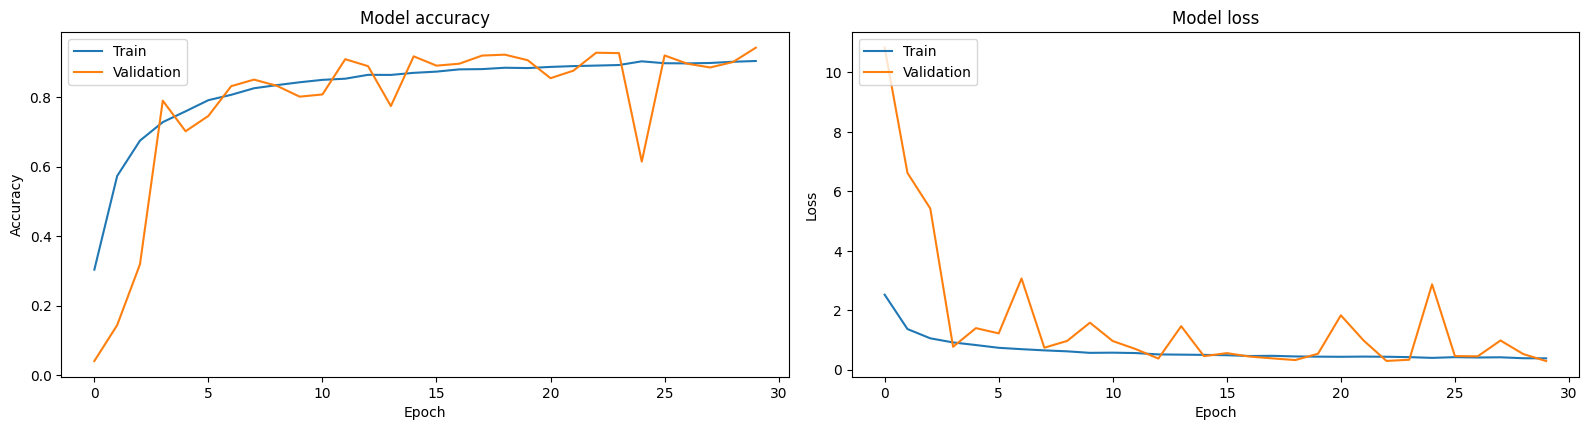

In [ ]:
train_images = np.loadtxt("/kaggle/input/cv-project-dataset/csvTrainImages 13440x1024.csv", delimiter=",")
train_labels = np.loadtxt("/kaggle/input/cv-project-dataset/csvTrainLabel 13440x1.csv", delimiter=",")
test_images = np.loadtxt("/kaggle/input/cv-project-dataset/csvTestImages 3360x1024.csv", delimiter=",")
test_labels = np.loadtxt("/kaggle/input/cv-project-dataset/csvTestLabel 3360x1.csv", delimiter=",")

train_images = (train_images / 255.0).reshape((-1, 32, 32, 1))
test_images = (test_images / 255.0).reshape((-1, 32, 32, 1))
train_images = np.repeat(train_images, 3, axis=3)
test_images = np.repeat(test_images, 3, axis=3)

label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

train_images, val_images, train_labels_encoded, val_labels_encoded = train_test_split(
    train_images, train_labels_encoded, test_size=0.2, random_state=42
)

# Initialize ResNet50 model
base_model = ResNet50(weights='/kaggle/input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False, input_shape=(32, 32, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(np.unique(train_labels_encoded)), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

datagen = ImageDataGenerator(
    rotation_range=30, width_shift_range=0.1, height_shift_range=0.1,
    shear_range=0.2, zoom_range=0.2, horizontal_flip=False, fill_mode='nearest'
)
datagen.fit(train_images)

history = model.fit(
    datagen.flow(train_images, train_labels_encoded, batch_size=32),
    steps_per_epoch=len(train_images) // 32, epochs=30,
    validation_data=(val_images, val_labels_encoded)
)

test_loss, test_acc = model.evaluate(test_images, test_labels_encoded)
print(f'Test Accuracy: {test_acc}')

plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(2, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Conclusion

In conclusion, our project journeyed through the development and enhancement of Convolutional Neural Networks for Arabic Handwritten Character Recognition, yielding progressively improved results. Task 1 established our baseline with a custom CNN, achieving 91% accuracy at 10 epochs and 93.1% at 30 epochs. Task 2 improved upon this with data augmentation, enhancing the model's robustness and leading to 94.7% accuracy. Task 3 implemented the well-regarded AlexNet, substantially increasing accuracy to 97.3%, demonstrating the strength of established architectures. Finally, Task 4 utilized transfer learning with ResNet50 and fine-tuned our dataset, achieving 94.3% accuracy. The results illustrate key lessons in deep learning: the importance of model complexity, data quality, and advanced techniques like data augmentation and transfer learning, all of which contribute to the model's ability to generalize and accurately classify complex patterns in data.